In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
random = {}
bayes = {}

for file in os.listdir('./KNNResults'):
    digits = ''.join(filter(str.isdigit, file))
    if digits:
        dataset_id = int(digits)
        if 'random' in file:
            random[dataset_id] = pd.read_excel('./KNNResults/' + file)
        elif 'bayes' in file:
            bayes[dataset_id] = pd.read_excel('./KNNResults/' + file)

In [3]:
def plot_roc_auc_changes(random, bayes, title):

    def get_roc_changes(df):
        roc = []
        max_roc = 0

        for idx, row in df.iterrows():
            if row['mean_test_score'] > max_roc:
                max_roc = row['mean_test_score']
            roc.append((idx+1, max_roc))

        return roc

    roc_auc_random = get_roc_changes(random)
    roc_auc_bayes = get_roc_changes(bayes)

    fig, ax = plt.subplots()
    ax.plot([r[0] for r in roc_auc_random], [r[1] for r in roc_auc_random], label='Random Search', marker='h', color='#0cbffd')
    ax.plot([b[0] for b in roc_auc_bayes], [b[1] for b in roc_auc_bayes], label='Bayes', marker='o', color='#f641d5')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('ROC AUC')
    ax.set_title(title)
    ax.legend()
    
    return fig


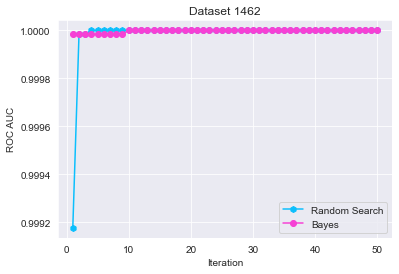

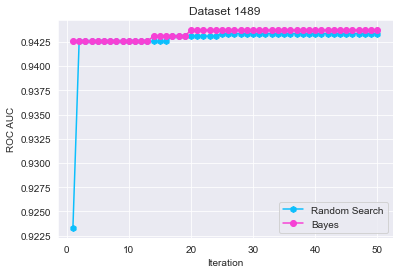

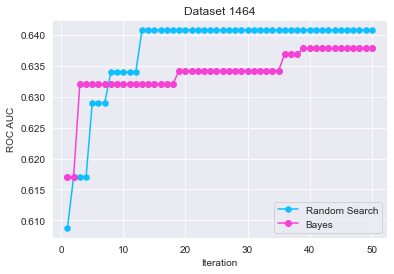

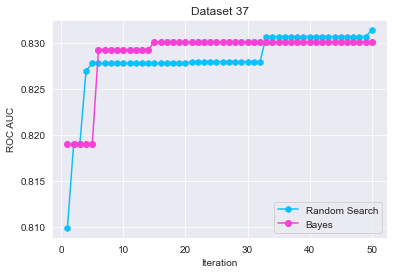

In [4]:
for dataset_id in random.keys():
    fig = plot_roc_auc_changes(random[dataset_id], bayes[dataset_id], 'Dataset ' + str(dataset_id))

In [5]:
def plot_roc_auc_violin(random, bayes, title):
    data = [random['mean_test_score'].to_list(), bayes['mean_test_score'].to_list()]

    fig, ax = plt.subplots()
    sns.violinplot(data=data, ax=ax, palette=["#0cbffd", "#f641d5"])

    positions = np.arange(len(data))
    for i, values in enumerate(data):
        ax.scatter(np.full_like(values, positions[i] + 0.15), values, color='black', alpha=0.6, edgecolor='white')

    ax.set_xticks(positions)
    ax.set_xticklabels(['Random Search', 'Bayes'])
    ax.set_ylabel('ROC AUC')
    ax.set_title(title)

    return fig

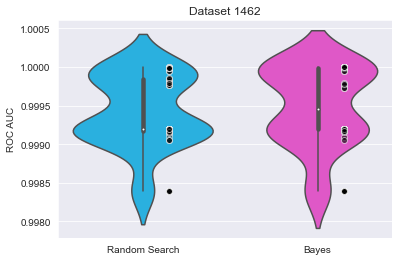

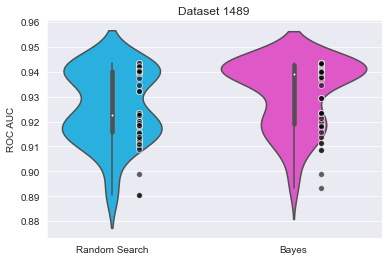

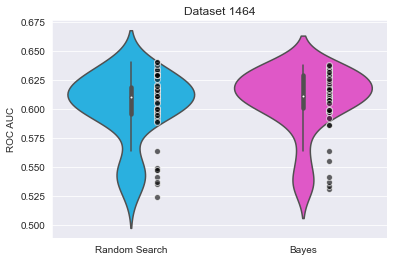

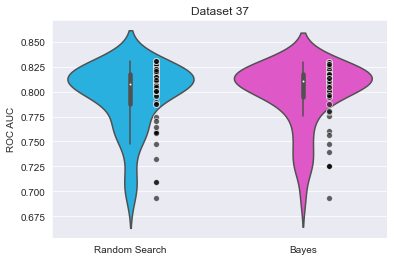

In [6]:
for dataset_id in random.keys():
    boxplot = plot_roc_auc_violin(random[dataset_id], bayes[dataset_id], 'Dataset ' + str(dataset_id))

## Tunability

In [7]:
baseline_scores = pd.read_excel('./KNNResults/baseline_scores.xlsx')
baseline_scores

,Dataset ID,Mean ROC AUC
0,1489,0.926583
1,1464,0.576570
2,1462,0.998656
3,37,0.769242


In [8]:
random_tunability = pd.DataFrame()
bayes_tunability = pd.DataFrame()

for dataset_id in random.keys():
    id_baseline = baseline_scores[baseline_scores['Dataset ID']==dataset_id]['Mean ROC AUC'].values[0]
    random_tunability[str(dataset_id)] = random[dataset_id]['mean_test_score'] - id_baseline
    bayes_tunability[str(dataset_id)] = bayes[dataset_id]['mean_test_score'] - id_baseline    

In [9]:
bayes_tunability.mean(axis=0)

1462    0.000826
1489    0.004680
1464    0.031402
37      0.029179
dtype: float64

In [10]:
random_tunability.mean(axis=0)

1462    0.000758
1489   -0.000952
1464    0.025779
37      0.026650
dtype: float64

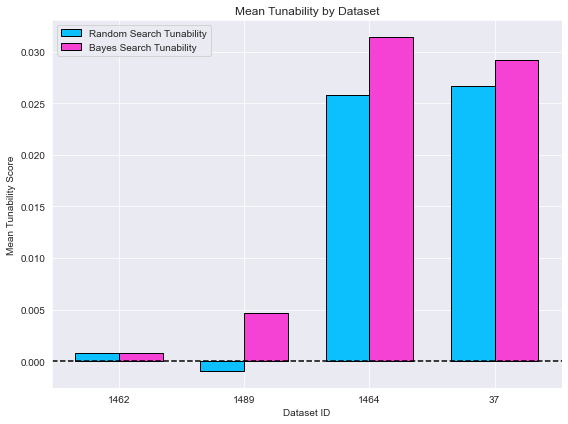

In [11]:
bayes_mean = bayes_tunability.mean(axis=0)
random_mean = random_tunability.mean(axis=0)

width = 0.35 
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(np.arange(4) - width/2, random_mean, width, label='Random Search Tunability', color="#0cbffd", edgecolor='black') 
ax.bar(np.arange(4) + width/2, bayes_mean, width, label='Bayes Search Tunability', color="#f641d5", edgecolor='black')

ax.set_ylabel('Mean Tunability Score')
ax.set_xlabel('Dataset ID')
ax.set_title('Mean Tunability by Dataset')
ax.set_xticks(np.arange(4))
ax.set_xticklabels(bayes_mean.index)
ax.axhline(y=0, color='black', linestyle='--')
ax.legend()

plt.tight_layout()
plt.show()